In [1]:
import os
import warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 as cv

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory, load_img, plot_model
import keras_tuner as kt

In [5]:
train_path = r"/kaggle/input/tomatoleaf/tomato/train"
val_path = r"/kaggle/input/tomatoleaf/tomato/val"

In [6]:
train_ds = image_dataset_from_directory(directory=train_path, 
                                          labels='inferred', 
                                          label_mode='int', 
                                          batch_size=32, 
                                          image_size=(224,224))

val_ds = image_dataset_from_directory(directory=val_path, 
                                          labels='inferred', 
                                          label_mode='int', 
                                          batch_size=32, 
                                          image_size=(224,224))


Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [7]:
def process(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

In [8]:
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(128, (3, 3),input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
calls = EarlyStopping(patience=10, verbose=1)

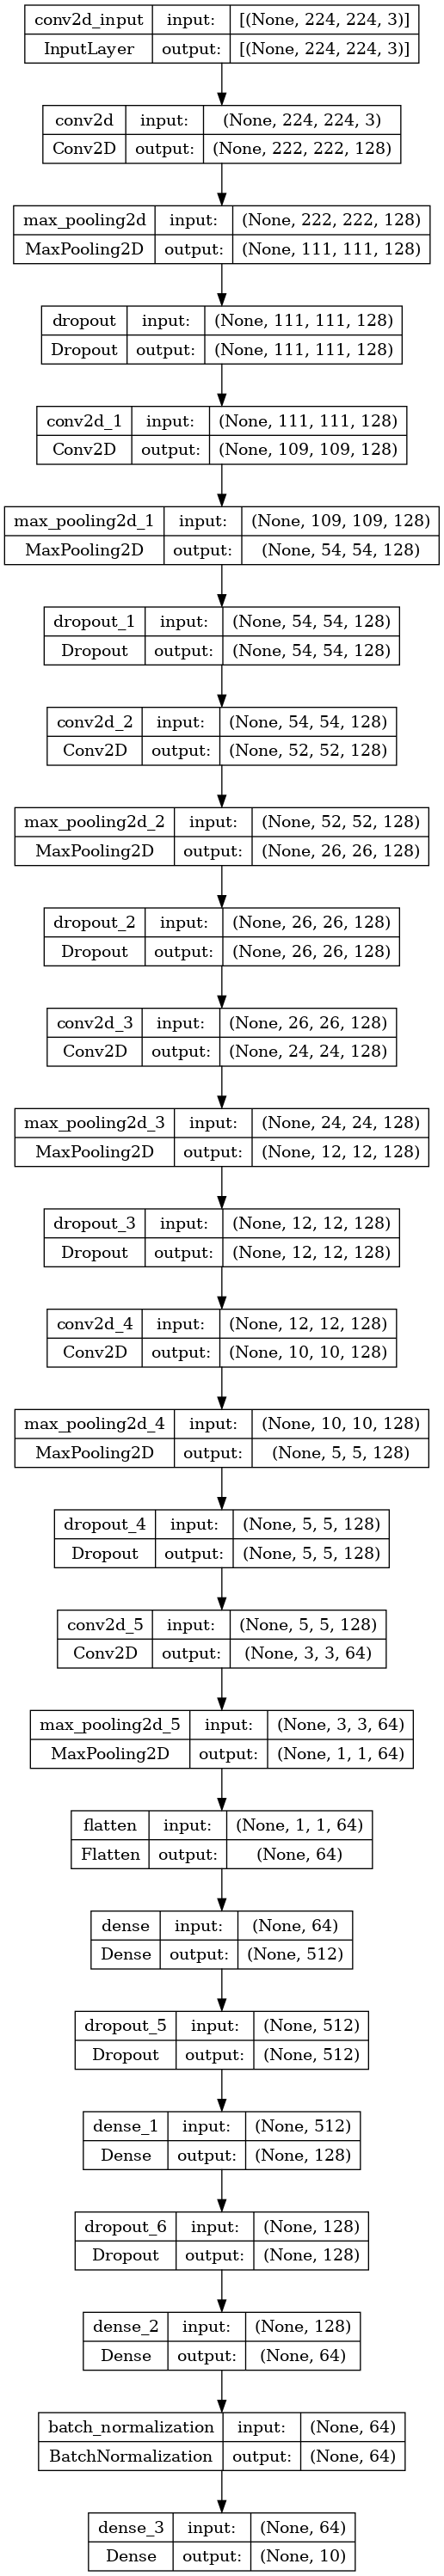

In [12]:
plot_model(model, show_shapes=True)

In [13]:
final = model.fit(train_ds, epochs= 100, callbacks= calls, validation_data=val_ds, verbose=True)

Epoch 1/100


2023-09-25 10:43:06.029526: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 115s 299ms/step - loss: 1.9604 - accuracy: 0.2537 - val_loss: 1.9507 - val_accuracy: 0.2680
Epoch 2/100
313/313 [==============================] - 87s 276ms/step - loss: 1.3964 - accuracy: 0.4807 - val_loss: 1.7382 - val_accuracy: 0.3740
Epoch 3/100
313/313 [==============================] - 86s 273ms/step - loss: 1.0814 - accuracy: 0.5928 - val_loss: 0.8958 - val_accuracy: 0.6690
Epoch 4/100
313/313 [==============================] - 88s 281ms/step - loss: 0.8343 - accuracy: 0.7005 - val_loss: 0.8949 - val_accuracy: 0.6940
Epoch 5/100
313/313 [==============================] - 87s 274ms/step - loss: 0.6982 - accuracy: 0.7547 - val_loss: 0.7396 - val_accuracy: 0.7530
Epoch 6/100
313/313 [==============================] - 86s 275ms/step - loss: 0.5906 - accuracy: 0.7886 - val_loss: 0.5629 - val_accuracy: 0.7990
Epoch 7/100
313/313 [==============================] - 86s 272ms/step - loss: 0.5493 - accuracy: 0.8095 - val_loss: 0.5801 - val_accura

In [14]:
pred = model.predict(val_ds)

32/32 [==============================] - 57s 67ms/step


In [15]:
pred

array([[1.51054227e-08, 2.33875039e-06, 5.13504517e-07, ...,
        6.67996929e-08, 9.95513499e-01, 3.22039205e-06],
       [7.01911330e-01, 1.38504419e-03, 1.12824033e-04, ...,
        8.46213312e-04, 2.30140563e-06, 5.31159967e-05],
       [2.03991798e-03, 7.11916536e-02, 2.73196865e-03, ...,
        1.60750584e-03, 1.95687916e-03, 8.93373508e-05],
       ...,
       [3.29295261e-04, 9.94965667e-05, 4.22021234e-03, ...,
        1.41904866e-06, 2.04493801e-07, 9.95177388e-01],
       [1.69365683e-06, 2.59878871e-05, 4.52765607e-06, ...,
        4.42642295e-06, 9.96935129e-01, 1.08025306e-04],
       [7.54388843e-11, 5.85068827e-10, 3.66941549e-06, ...,
        3.39120789e-12, 1.12110765e-09, 9.99995232e-01]], dtype=float32)

In [16]:
bacterial = cv.imread("/kaggle/input/tomatoleaf/tomato/val/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG")
leaf_mold = cv.imread("/kaggle/input/tomatoleaf/tomato/val/Tomato___Leaf_Mold/02a29ab9-8cba-47a0-bc2f-e7af7dbae149___Crnl_L.Mold 7165.JPG")
healthy = cv.imread("/kaggle/input/tomatoleaf/tomato/val/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG")

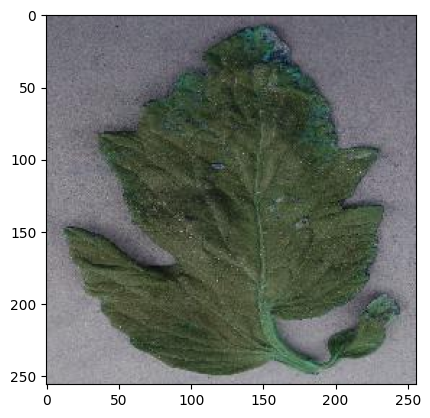

In [17]:
plt.imshow(bacterial)

In [18]:
bacterial = cv.resize(bacterial, (224,224))
bacterial_input = bacterial.reshape((1, 224,224,3))

leaf_mold = cv.resize(leaf_mold, (224,224))
leaf_mold_input = leaf_mold.reshape((1, 224,224,3))

healthy = cv.resize(healthy, (224,224))
healthy_input = healthy.reshape((1, 224,224,3))

In [19]:
model.predict(bacterial_input).argmax(axis = 1)

1/1 [==============================] - 0s 490ms/step


array([8])

In [20]:
model.predict(leaf_mold_input).argmax(axis = 1)

1/1 [==============================] - 0s 20ms/step


array([8])

In [21]:
model.predict(healthy_input).argmax(axis = 1)

1/1 [==============================] - 0s 21ms/step


array([8])

In [22]:
final.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

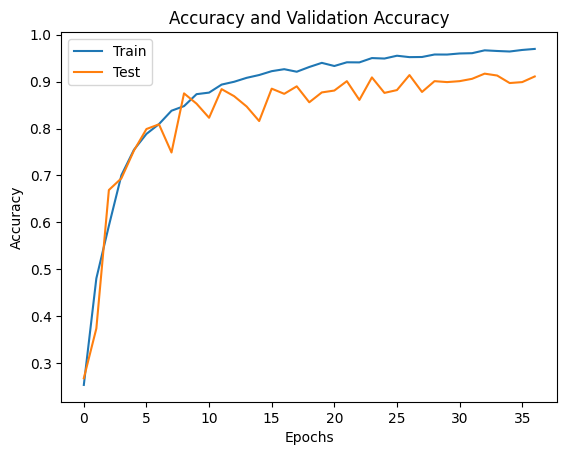

In [23]:
plt.plot(final.history['accuracy'])
plt.plot(final.history['val_accuracy'])
plt.title('Accuracy and Validation Accuracy')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

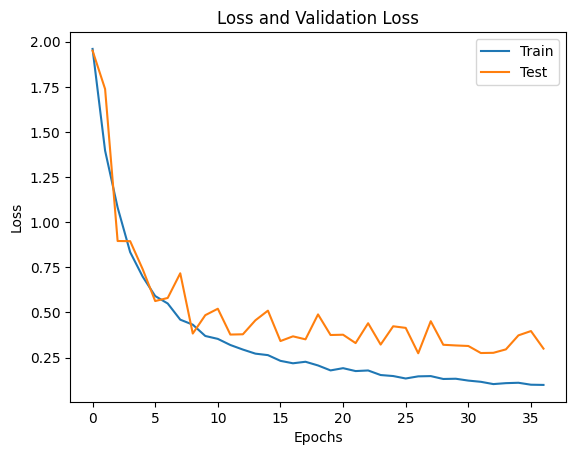

In [24]:
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()